<a href="https://colab.research.google.com/github/ranaehelal/Contrast-Enhancement/blob/main/jellyfish_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import cv2
from google.colab.patches import cv2_imshow


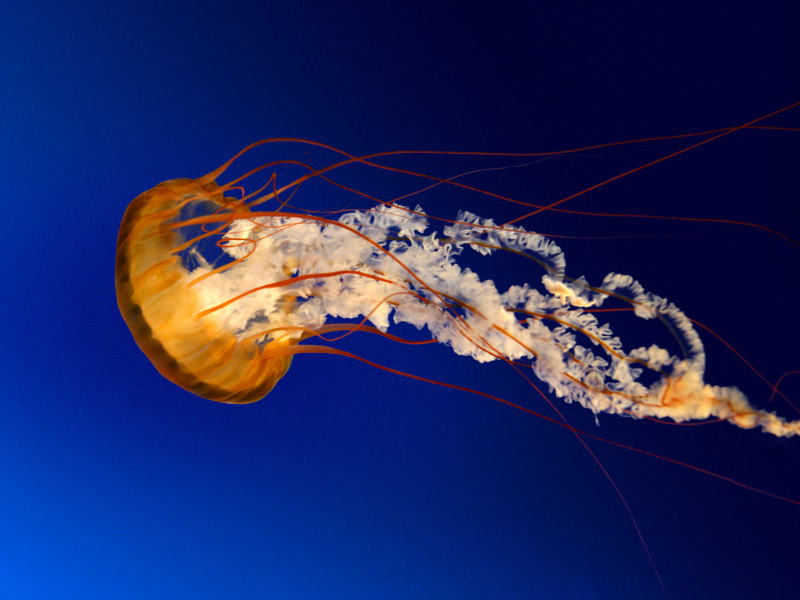

In [65]:

image_path = "/content/jellyfish.jpg"
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (800, 600))


if image is None:
    print("Error: Could not load image. Check filename or format.")
else:
    cv2_imshow(resized_image)


# RGB

(-0.5, 1023.5, 767.5, -0.5)

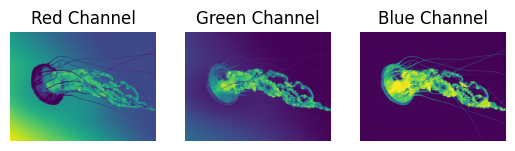

In [66]:
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
plt.imshow(image[:,:,0])
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image[:,:,1])
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image[:,:,2])
plt.title("Blue Channel")
plt.axis("off")


(-0.5, 1023.5, 767.5, -0.5)

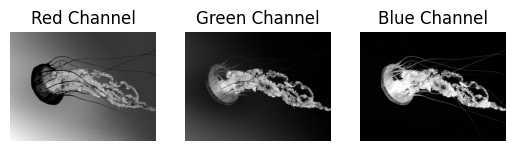

In [67]:

plt.subplot(1, 3, 1)
plt.imshow(image[:,:,0],cmap='gray')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image[:,:,1],cmap='gray')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image[:,:,2],cmap='gray')
plt.title("Blue Channel")
plt.axis("off")

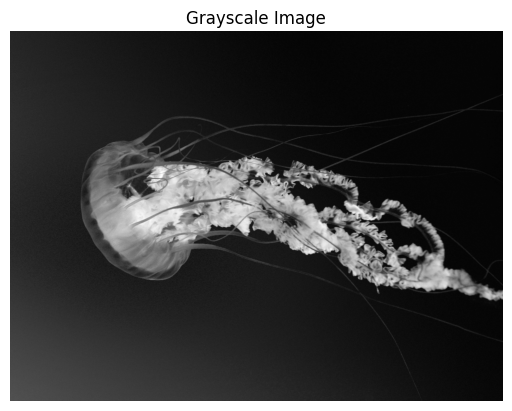

In [68]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

#Arithmetic Operations

(-0.5, 1023.5, 767.5, -0.5)

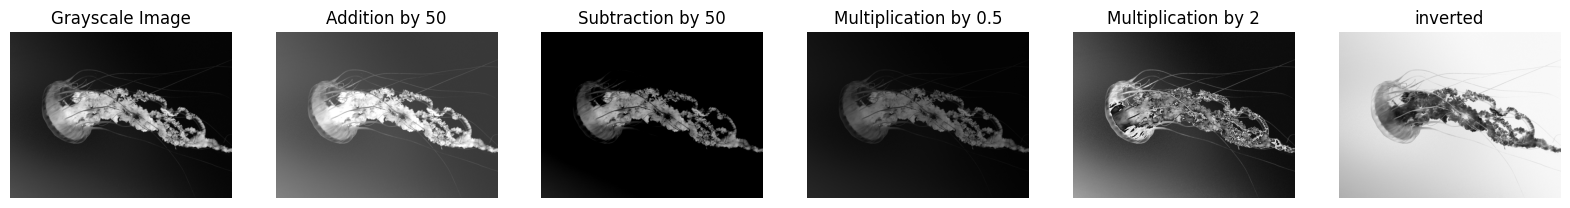

In [69]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 6, 1)
plt.imshow(gray_image,cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 6, 2)
plt.imshow(gray_image+50.0,cmap='gray',vmin=0,vmax=255)
plt.title("Addition by 50")
plt.axis("off")

plt.subplot(1, 6, 3)
plt.imshow(gray_image-50.0,cmap='gray',vmin=0,vmax=255)
plt.title("Subtraction by 50")
plt.axis("off")

plt.subplot(1, 6, 4)
plt.imshow(gray_image*0.5,cmap='gray',vmin=0,vmax=255)
plt.title("Multiplication by 0.5")
plt.axis("off")

plt.subplot(1, 6, 5)
plt.imshow(gray_image*2,cmap='gray',vmin=0,vmax=255)
plt.title("Multiplication by 2")
plt.axis("off")

plt.subplot(1, 6, 6)
plt.imshow(255.0-gray_image,cmap='gray',vmin=0,vmax=255)
plt.title("inverted")
plt.axis("off")




# Low contrast image

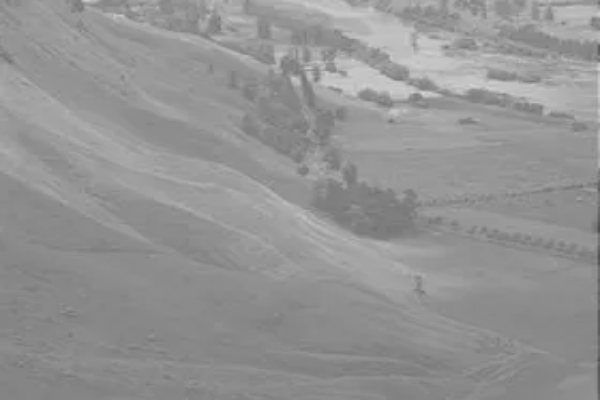

In [74]:

image_path = "/content/stretch_original.webp"
low_image = cv2.imread(image_path)
resized_image = cv2.resize(low_image, (600, 400))


if low_image is None:
    print("Error: Could not load image. Check filename or format.")
else:
    cv2_imshow(resized_image)


# Contrast Stretching

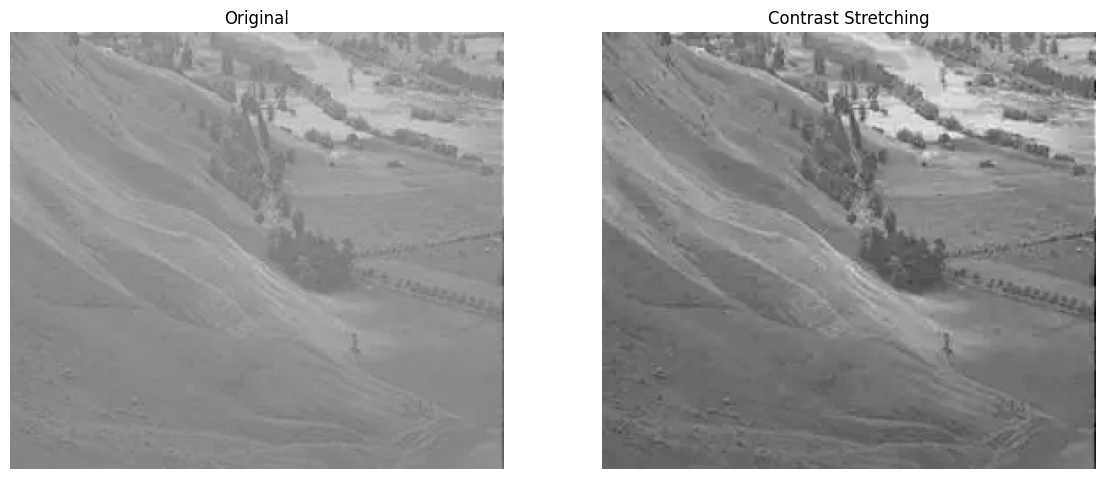

In [85]:
import numpy as np
r_min, r_max = np.min(low_image), np.max(low_image)

stretched_image=((low_image-r_min)/(r_max-r_min))*255
stretched_image = np.uint8(stretched_image)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.imshow(low_image, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap="gray")
plt.title("Contrast Stretching")
plt.axis("off")

plt.show()



# Gamma Correction

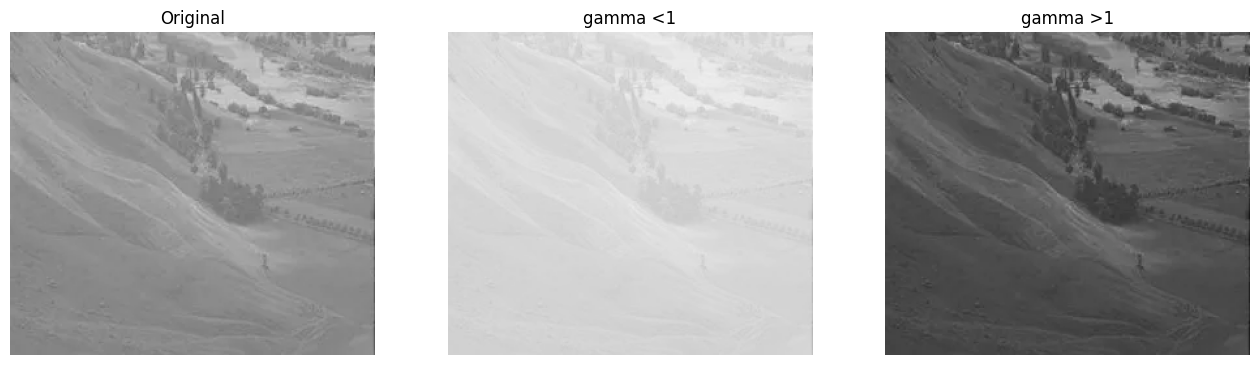

In [86]:
def gamma_correction(image, gamma):

    image_normalized = image / 255.0
    gamma_corrected = np.power(image_normalized,gamma)*255
    return np.uint8(gamma_corrected)

light_image=gamma_correction(low_image,0.3)

dark_image=gamma_correction(low_image,2)

plt.figure(figsize=(16, 8))


plt.subplot(1, 3, 1)
plt.imshow(low_image, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(light_image, cmap="gray")
plt.title("gamma <1")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(dark_image, cmap="gray")
plt.title("gamma >1")
plt.axis("off")

plt.show()


# Logarithmic Transformation

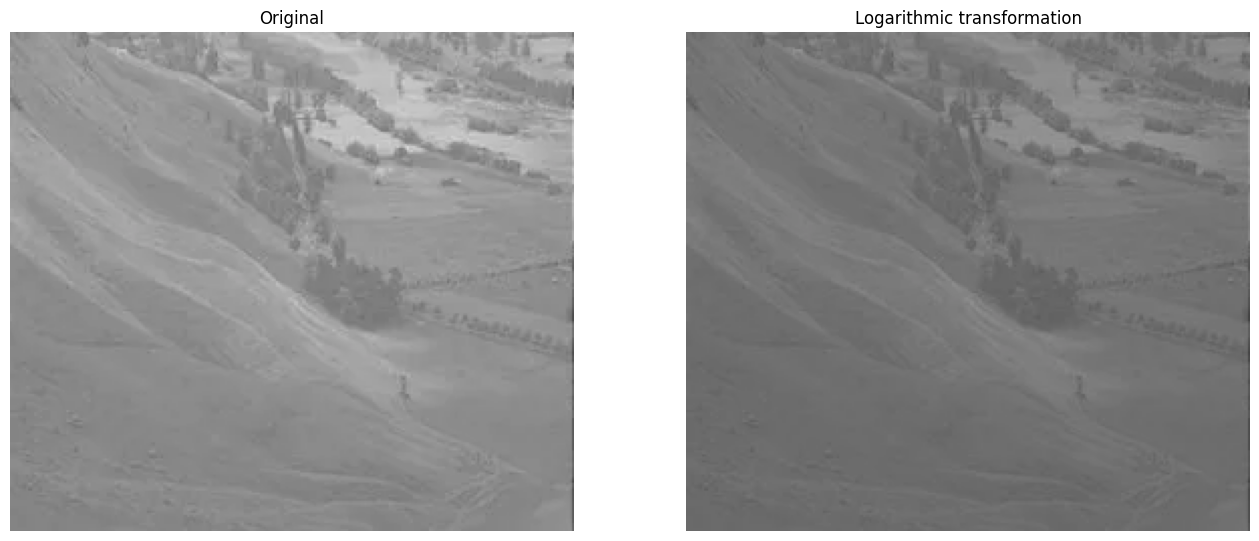

In [90]:
def logarithmic_transformation(image,c=1):
    image_normalized = image / 255.0


    gamma_corrected = c*np.log(image_normalized+1)*255
    return np.uint8(gamma_corrected)

log_image=logarithmic_transformation(low_image)


plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
plt.imshow(low_image, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(log_image, cmap="gray")
plt.title("Logarithmic transformation")
plt.axis("off")



plt.show()


# Intensity Slicing

(-0.5, 279.5, 247.5, -0.5)

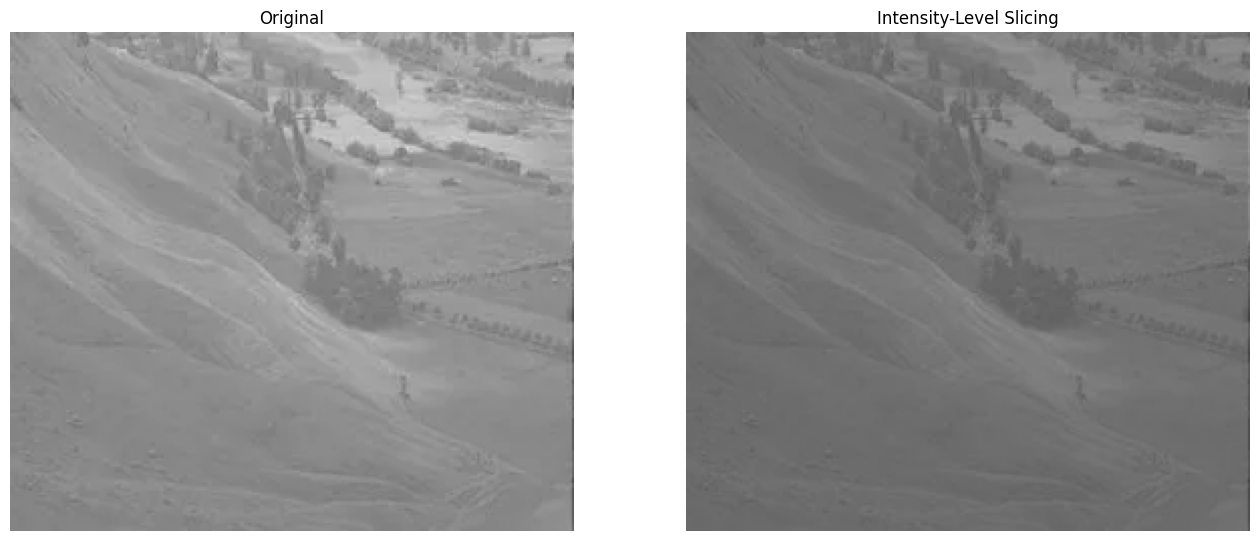

In [93]:
def intensity_slicing (image , lower ,upper):

    sliced = np.where((image >= lower) & (image <= upper), 0, image)
    return np.uint8(sliced)

sliced_image=intensity_slicing(low_image,100,150)


plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
plt.imshow(low_image, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(log_image, cmap="gray")
plt.title("Intensity-Level Slicing")
plt.axis("off")

